# Social media Data Mining Final Project


# IMPACT OF PANDEMIC ON MENTAL HEALTH USING TWITTER DATA

## Team members:
### * Nirutha Amaranath
### * Hemaleka Mohanram
### * Pallavi Giri
### * Priyanka Balwadkar

## Problem statement

### The goal of this project is to analyze the impact of the pandemic on mental health and the different mental health conditions people are suffering. We will analyze tweets using different classifiers to identify the number of people experiencing depression, anxiety, and stress. The steps include mining the Twitter data, preprocessing, sentiment analysis, machine learning methods for classification and analysis of different mental illnesses before and after the pandemic

### There are 4 folders 
### * Code folder which contains the codes for the project
### * DATA folder stores all the the csv files with tweets collected from twitter
### * Input folder contains the oauth csv file which has tweets access token and secret and APi access token and secret
### * Input folder also contains combined.csv file which is created by combining and consolidating all the collected tweets into a single csv
### * output folder which saves the graphs and output images

## Install the necessary packages

In [ ]:
! pip install wordcloud
! pip install cufflinks

## Import the packages

In [1]:
import os
import pandas as pd
import re

In [2]:
# packages needed for twitter data collection
import tweepy as tw
from datetime import datetime



In [3]:
# packages needed for preprocessing
import nltk
from bs4 import BeautifulSoup
import string
# stop words
from nltk.corpus import stopwords
# import tokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import re

In [4]:
# package needed for word cloud
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 


In [5]:
import  textblob
from textblob.classifiers import NaiveBayesClassifier
from textblob import TextBlob


In [6]:
import csv
from csv import writer
import numpy as np
from matplotlib.pyplot import pie, axis, show

In [7]:
# packages needed for topic modeling
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
#%matplotlib inline
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from sklearn.feature_extraction.text import CountVectorizer

from nltk.corpus import stopwords


In [8]:
## packages needed for classification
import cufflinks as cf

import sklearn

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix 

from sklearn.linear_model import LogisticRegression

from sklearn import model_selection, naive_bayes, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [9]:
#Packages needed for clustering
import json
import pandas as pd
import time
import numpy as np
import itertools
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split

import nltk
import string

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

### adding paths

In [14]:
mydir = os.getcwd()
mydir


'C:\\Users\\hemal\\Desktop\\Masters\\SEM2\\SMDM\\Project\\Final_Project'

In [12]:
# to move from code folder to parent directory 
os.chdir("..")#"C:\\Users\\hemal\\Desktop\\Masters\\SEM2\\SMDM\\Project\\Final_Project")

In [13]:
### specify the PAths to different folders 
inputpath = os.getcwd() + "\\Input\\" #"C:\\Users\\hemal\\Desktop\\Masters\\SEM2\\SMDM\\Project\\Final_Project\\Input"
outputpath = os.getcwd() +"\\Output\\" #"C:\\Users\\hemal\\Desktop\\Masters\\SEM2\\SMDM\\Project\\Final_Project\\Output"
datapath = os.getcwd() + "\\Data\\" #"C:\\Users\\hemal\\Desktop\\Masters\\SEM2\\SMDM\\Project\\Final_Project\\Data"

# DATA COLLECTION

### Collecting tweets from twitter using tweepy package

## For twitter authorisation, the access token and secret, API key and API secret are stored in a CSV file inside the folder input which is read to access the value
## as a means of data Abstraction

In [ ]:
oauthpath = inputpath + "\\oauth.csv"
oauth=pd.read_csv(oauthpath)
print("Successfully read the oauth file")
#oauth

In [ ]:
CONSUMER_KEY = oauth["CONSUMER_KEY"][0]
CONSUMER_SECRET =oauth["CONSUMER_SECRET"][0]
OAUTH_TOKEN = oauth["OAUTH_TOKEN"][0]
OAUTH_TOKEN_SECRET =oauth["OAUTH_TOKEN_SECRET"][0] 


### pass the oauth tokens to connect to twitter

In [ ]:
auth = tw.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tw.API(auth, wait_on_rate_limit=True)

### Function name: df_creation_twitter
### This function is used collect tweets by specific search keywords and create a CSV file with search word name + date at which it is created and saved inside the DATA folder




In [ ]:
def df_creation_twitter(api,search_words,date_since,limit):
    #data=api.search(q=search_words, lang="en",since=date_since, rpp=limit)
    tweets = tw.Cursor(api.search,q=search_words,since=date_since,lang="en",tweet_mode="extended",result_type="recent").items(limit)
    now = datetime.now()

    current_time = now.strftime("%m_%d_%Y_%H_%M")
    
    data_dict = { "ID":[],"User_Name":[],"created":[],"tweet":[]}
    csv_name = datapath + search_words[1:]+current_time+"_twitter.csv"
    
    for tweet in tweets:
        print(tweet.id)
        data_dict["ID"].append(tweet.id)
        data_dict["User_Name"].append(tweet.user.name)
        data_dict["created"].append(tweet.created_at)
        data_dict["tweet"].append(tweet.full_text) # tweet.text if we dont use tweet_mode = "extended"

    data_frame = pd.DataFrame(data_dict)
    data_frame.to_csv(csv_name, index=False)
    return data_frame
    

### Specify all the keywords to be searched as a list to search_words


In [ ]:

search_words = ["#depression","#anxiety","#ADHD","#PTSD"]
date_since = "2019-01-01"
limit=10000


### We loop over for each search word and create csv files and save it inside DATA folder

In [ ]:
# Define the search term and the date_since date as variables
# loop over for each keyword, extract the tweets and create a csv file
for search_key in search_words:
    print("Collecting tweets for keyword: {0}...".format(search_key[1:]))
    df=df_creation_twitter(api,search_key,date_since,limit)
    print("Total tweeets collected: {0}".format(len(df)))
    print(df.head())


### Another data collection code

In [ ]:
csvFile = open('Data.csv', 'a')
#Use csv Writer
csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search,q="#depressed OR #depression OR #loneliness OR #hopelessness OR anxiety OR sad", tweet_mode="extended",
                           lang="en",
                           since="2020-10-01").items():
    csvWriter.writerow([tweet.created_at, tweet.full_text.encode('utf-8')])

### After Data collection, we will combine all the csv files into a single CSV file in a specific format with only tweets as columnsand create combined.csv which is saved inside the input folder

### Read the combined.CSV file from input folder


### Combined csv file contains the tweets collected in different period of time related to depression, covid, pandemic, mental health etc.

In [ ]:
combinedFilePath = inputpath+ "combined_file.csv"
allTweets=pd.read_csv(combinedFilePath,engine="python")

In [ ]:
print("Read the combined csv file succesfully")
print(allTweets.head())
print(len(allTweets))

### From the combined data, filter for the tweets which has the keyword COVID or pandemic
### We do this to get all COVID related tweets which can be used in our analysis 

In [ ]:
search_values = ['covid', 'pandemic','corona']

patt = '|'.join(search_values)

pandemic_tweets = allTweets[allTweets.apply(lambda x: x.str.contains(patt,flags = re.IGNORECASE)).any(1)]

In [ ]:
# after filtering the data we will reset the index 
pandemic_tweets.reset_index(drop=True)

## Preprocessing of data

### Preprocessing is done process our tweets to make it reay for analysis
### In preprocessing, we'll remove the punctuations, URL, stopwords and toeknize and lemmatize the data
### We are using NLTK package for preprocessing


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')


In [ ]:
stop_words = stopwords.words('english')
print(stop_words)
stop_words.extend(['rt',"brt"])

### We have created seperate functions for each preprocessing step
### Function name: remove_URL
    * This function is used to remove the urls from our tweets. This uses the package re
### Function name: remove_punctuation
    * This function is used to remove the punctuations in our tweets. This removes all the punctuations from string.punctuation 
### Function name: tokenize_my_text
    * This function is used to tokenize my tweets. It uses RegexpTokenizer which considers each word as a seperate token
### Function name: remove_stopwords
    * This function is used remove the unnecessary stop words from our tweets we use nltk.stopwords
### Function name: lemmatize_my_text
    * This function is used to lemmatize my tweets. Lemmatization is a process where convert the words to its root words. we use WordNetLemmatizer 
### Function name: stem_my_text
    * this function is used to stem the words. this is similar to lemmatization. we use PorterStemmer for this function. 
    

In [ ]:
def remove_URL(text):
    """Remove URLs from a sample string"""
    text_without_url = re.sub(r"http\S+", "", text) 
    return text_without_url

In [ ]:
def remove_punctuation(text):
    text_without_punctuation = "".join([c for c in text if c not in string.punctuation])
    return text_without_punctuation

In [ ]:
# tokenizing
tokenizer = RegexpTokenizer(r'\w+')
#‘\s+’, gaps=True grabs everything except space as token
#‘\w+|\$[\d\.]+|\S+’ = splits up by spaces or by periods that are not attached to a digit
def tokenize_my_text(text):
    words_after_tokenization = tokenizer.tokenize(text.lower())
    return words_after_tokenization

In [ ]:
def remove_stopwords(text):
    words = [w for w in text if w not in stop_words]
    return words

In [ ]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize_my_text(text):
    text_after_lemmatization = [lemmatizer.lemmatize(i) for i in text]
    return text_after_lemmatization


In [ ]:
# stemming
stemmer = PorterStemmer()
def stem_my_text(text):
    text_after_stemming = " ".join([stemmer.stem(i) for i in text])
    return text_after_stemming

## Preprocessing

In [ ]:
#allTweets
pandemic_tweets.head()

In [ ]:
# remove url
pandemic_tweets["preprocessed_data"] = pandemic_tweets["Tweets"].apply(lambda x: remove_URL(x))
print(pandemic_tweets["preprocessed_data"])


In [ ]:
# remove punctuation
pandemic_tweets["preprocessed_data"] = pandemic_tweets["preprocessed_data"].apply(lambda x: remove_punctuation(x))
print(pandemic_tweets["preprocessed_data"])



In [ ]:
# tokenize my tweets
pandemic_tweets["preprocessed_data"] = pandemic_tweets["preprocessed_data"].apply(lambda x: tokenize_my_text(x))
print(pandemic_tweets["preprocessed_data"])



In [ ]:
# remove stop words
pandemic_tweets["preprocessed_data"] = pandemic_tweets["preprocessed_data"].apply(lambda x: remove_stopwords(x))
print(pandemic_tweets["preprocessed_data"])


In [ ]:
# lemmatization
pandemic_tweets["preprocessed_data"] = pandemic_tweets["preprocessed_data"].apply(lambda x: lemmatize_my_text(x))
print(pandemic_tweets["preprocessed_data"])


In [ ]:
print(pandemic_tweets["preprocessed_data"])


In [ ]:
preprocessed1 = pd.DataFrame(pandemic_tweets["preprocessed_data"])


In [ ]:
# write pd to csv
preprocessedpath = inputpath + "Preprocessed_data_pandemic_tweets.csv"
preprocessed1.to_csv(preprocessedpath,header=["Preprocessed_data"],encoding="unicode_escape",index=False)

## Word cloud
### We create Word cloud for the preprocessed pandemic tweets to find the most commonly occuring words 
### word cloud will give us an idea of our data

In [ ]:
comment_words = '' 
stopwords=set((STOPWORDS).union(set(["rt","brt","ixe2x80x99m","amp","itxe2x80x99","itxe2x80x99s"]))) 
for list_tokens in allTweets["preprocessed_data"]:
    comment_words += " ".join(list_tokens)+" "
    


In [ ]:
len(comment_words)

In [ ]:
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# save the word cloud inside the output folder
wordcloud_path = outputpath + "wordCloud.png"
wordcloud.to_file(wordcloud_path)

## Sentiment analysis
    * Sentiment analysis is a process for finding out the sentiment of our tweets 
    * sentiments can be positive, negative or neutral
    * We use a file dictionary.tsv which contains all the keywords related to depression
    * We train a naive bayes model using this dictionary.tsv and then predict the sentiment of our tweets
    * we classify the negative sentiment tweets as depressed and others as non depressed

In [ ]:
nltk.download('punkt')

In [ ]:
dictionary_df=pd.read_csv("dictionary.tsv",sep= "\t")

In [ ]:
dictionary_df


In [ ]:
import csv
y=[]
with open("dictionary.tsv") as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    for row in reader:
        i = []
        i.append(row[2])
        i.append(row[5])
        y.append(i)
    print("===========================")
    print("Dictionary Preparation Done")
    print("===========================\n\n")
    print(y)

In [ ]:
# tells what all variables currently in use
%whos

In [ ]:
cl=NaiveBayesClassifier(y)

### Function name : append_list_as_row
    * This function is used to open and write to a csv file

In [ ]:

def append_list_as_row(file_name, list_of_elem):
    # Open file in append mode
    with open(file_name, 'a+', newline='') as write_obj:
        # Create a writer object from csv module
        csv_writer = writer(write_obj)
        # Add contents of list as last row in the csv file
        csv_writer.writerow(list_of_elem)

In [ ]:
sentiment_results= pandemic_tweets.copy(deep = True)


In [ ]:
# create a new column for sentiments
sentiment_results["sentiment"] = np.nan

In [ ]:
sentiment_results["sentiment"] = (pandemic_tweets["preprocessed_data"]).apply(lambda x: cl.classify(x))
    

In [ ]:
# we loop for each tweet 
length = len(sentiment_results)
for i in range(0,length,2000):
    sentiment_results["sentiment"][i:i+2000] = (allTweets["preprocessed_data"][i:i+2000]).apply(lambda x: cl.classify(x))
    

In [ ]:
sentiment_results.head(50)

# PIE graph

In [ ]:
# pie graph
sentiment_results["sentiment"].value_counts().plot(kind='pie')

In [ ]:
 data2019path =inputpath + "outputdata.csv"
df = pd.read_csv(data2019path)
fig = df['sentiment'].value_counts().plot(kind='pie',autopct='%1.1f%%',title="2019-Tweets",figsize=(5,5),labels=['Negative','Neutral','Positive']).get_figure()

## Bar plot

In [ ]:

labels = ['  Year - 2019','  Year - 2020']
x = np.arange(len(labels))
width = 0.1

y = [24.3,24.9]
z = [37,26.5]
k = [38.7,48.6]

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot()

rects1 = ax.bar(ind, y, width=0.1, color='gold', label='Positive')
rects2 = ax.bar(ind+width, z, width=0.1, color='c',label='Neutral')
rects3 = ax.bar(ind+width*2, k, width=0.1, color='indigo',label='Negative')

ax.set_ylabel('Percentage')
ax.set_title('Depression tweets by year\n')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.00*h, '%d'%int(h),
                ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
plt.show()
figurepath = outputpath + "BarplotAnalysis.png"
fig.savefig(figurepath)

## Topic modeling
### Topic modeling is a process to identify the mostly likely topics present in a group of documents
### we used LDA model for topic modeling - we used gensim package

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
# NLTK Stop words
## We remove the unnecessary words from the text data like "the", "a", etc which does not have any significance
stop_words = stopwords.words('english')
print(stop_words)
stop_words.extend(['from', 'subject', 're', 'edu', 'use',"rt"])

## Classification of data into depressed and not depressed

In [ ]:
## read the sentiment analysis result csv or we can take it from df directly

In [15]:
sentimentpath = inputpath + "sentiment_analysisComplete.csv"
sentiment_results=pd.read_csv(sentimentpath,engine="python")

In [16]:
sentiment_results

,Tweets,preprocessed_data,sentiment
0,The #COVID19 health crisis has prompted an exp...,"['covid19', 'health', 'crisis', 'prompted', 'e...",negative
1,AT&amp;T Supports Families &amp; Educators Dur...,"['atampt', 'support', 'family', 'amp', 'educat...",positive
2,"RT @reach4kids: #REACH4kids Harlan Gephart, MD...","['reach4kids', 'reach4kids', 'harlan', 'gephar...",negative
3,RT @WPCmeetings: Scan the barcode and register...,"['wpcmeetings', 'scan', 'barcode', 'register',...",negative
4,Scan the barcode and register for the internat...,"['scan', 'barcode', 'register', 'international...",negative
...,...,...,...
90023,#PresidentElectBiden : will incoming #Biden ad...,"['presidentelectbiden', 'incoming', 'biden', '...",neutral
90024,Went to the store and bought myself a box of t...,"['went', 'store', 'bought', 'box', 'tissue', '...",positive
90025,Now can someone come over here &amp; get this?...,"['someone', 'come', 'amp', 'get', '2020electio...",negative
90026,Carl Gustav Jung about the Great Danger\n\n#Me...,"['carl', 'gustav', 'jung', 'great', 'danger', ...",neutral


In [17]:

len(sentiment_results)

90028

### counting total positive negative and neutral 

In [18]:
sentiment_results.groupby(["sentiment"]).count()

,Tweets,preprocessed_data
sentiment,,
negative,46142,46142
neutral,8521,8521
positive,35365,35365


## filter only for positive and negative ignore neutral

In [19]:
sentiment_results_pn = sentiment_results[sentiment_results["sentiment"].isin(["positive","negative"])]

In [20]:
sentiment_results_pn

,Tweets,preprocessed_data,sentiment
0,The #COVID19 health crisis has prompted an exp...,"['covid19', 'health', 'crisis', 'prompted', 'e...",negative
1,AT&amp;T Supports Families &amp; Educators Dur...,"['atampt', 'support', 'family', 'amp', 'educat...",positive
2,"RT @reach4kids: #REACH4kids Harlan Gephart, MD...","['reach4kids', 'reach4kids', 'harlan', 'gephar...",negative
3,RT @WPCmeetings: Scan the barcode and register...,"['wpcmeetings', 'scan', 'barcode', 'register',...",negative
4,Scan the barcode and register for the internat...,"['scan', 'barcode', 'register', 'international...",negative
...,...,...,...
90019,Isolation and limited activities during #Coron...,"['isolation', 'limited', 'activity', 'coronavi...",negative
90021,Please remember our kids suffer during lockdow...,"['please', 'remember', 'kid', 'suffer', 'lockd...",positive
90022,#DeathAnxiety #Thanatophobia\n#OCD #depression...,"['deathanxiety', 'thanatophobia', 'ocd', 'depr...",negative
90024,Went to the store and bought myself a box of t...,"['went', 'store', 'bought', 'box', 'tissue', '...",positive


### Convert the categorical column to numerical column 

In [21]:
sentiment_results_pn["label"] = np.where(sentiment_results_pn['sentiment']=='positive', 0,1)

In [22]:
y = np.array(sentiment_results_pn["label"])
y

array([1, 0, 1, ..., 1, 0, 1])

In [23]:
sentiment_results_pn

,Tweets,preprocessed_data,sentiment,label
0,The #COVID19 health crisis has prompted an exp...,"['covid19', 'health', 'crisis', 'prompted', 'e...",negative,1
1,AT&amp;T Supports Families &amp; Educators Dur...,"['atampt', 'support', 'family', 'amp', 'educat...",positive,0
2,"RT @reach4kids: #REACH4kids Harlan Gephart, MD...","['reach4kids', 'reach4kids', 'harlan', 'gephar...",negative,1
3,RT @WPCmeetings: Scan the barcode and register...,"['wpcmeetings', 'scan', 'barcode', 'register',...",negative,1
4,Scan the barcode and register for the internat...,"['scan', 'barcode', 'register', 'international...",negative,1
...,...,...,...,...
90019,Isolation and limited activities during #Coron...,"['isolation', 'limited', 'activity', 'coronavi...",negative,1
90021,Please remember our kids suffer during lockdow...,"['please', 'remember', 'kid', 'suffer', 'lockd...",positive,0
90022,#DeathAnxiety #Thanatophobia\n#OCD #depression...,"['deathanxiety', 'thanatophobia', 'ocd', 'depr...",negative,1
90024,Went to the store and bought myself a box of t...,"['went', 'store', 'bought', 'box', 'tissue', '...",positive,0


In [24]:
only_depression = sentiment_results_pn[sentiment_results_pn["label"] == 1]

In [25]:
len(only_depression["Tweets"])

46142

## Doing topic modeling on depressed dataset to get the most popular topics 

In [ ]:
#convert the pandas dataframe to list of strings
only_depression_list = []
for x in only_depression["Tweets"]:
    only_depression_list.append(str(x))


In [ ]:
# Remove new line characters
data_1 = [re.sub('\s+', ' ', sent) for sent in only_depression_list]

# remove the \n
data_2 = [re.sub("\\n", "", sent) for sent in data_1]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data_2]


print(data[:1])

In [ ]:
# tokenize words and clean up text
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations



In [ ]:
data_words = list(sent_to_words(data))

print(data_words[:1])

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)



In [ ]:
# functions to remove stop words
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
print("data_words_nostops")
print(data_words_nostops[:1])
# Form Bigrams
data_words_bigrams = make_trigrams(data_words_nostops)
print("data_words_bigrams")
print(data_words_bigrams[:1])
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
print("id2word")
print(id2word)
# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])


In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
lda_model.print_topics()

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)


In [ ]:
vis

## graphs

### https://towardsdatascience.com/text-analysis-basics-in-python-443282942ec5

### Function name: get_top_n_words
     * This function is used get top n words

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


## Creating Biagrams and Triagrams
### Biagrams are nothing but the mostly commonly occuring two word combination
### Triagrams are nothing but the mostly commonly occuring three word combinations

In [ ]:
common_words = get_top_n_words(only_depression['preprocessed_data'], 20)
for word, freq in common_words:
    print(word, freq)


In [ ]:
# cufflinks package is used to create plots
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [ ]:
df2 = pd.DataFrame(common_words, columns = ['Tweet' , 'count'])
df2.groupby('Tweet').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in Tweets after removing stop words')


### Function name: get_top_n_bigram
    * This function is used to get the top n bigram words


In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


In [ ]:
common_words_bi = get_top_n_bigram(only_depression['preprocessed_data'], 20)
for word, freq in common_words_bi:
    print(word, freq)


In [ ]:
df4 = pd.DataFrame(common_words_bi, columns = ['Tweet' , 'count'])
df4.groupby('Tweet').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', xTitle= "Bigrams",yTitle='Count',theme="white", linecolor='black',colors=['blue'], title='Top 20 bigrams of Tweets')


### Function name: get_top_n_trigram
    * This function is used to get the top n triagram words

In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
common_words2 = get_top_n_trigram(only_depression['preprocessed_data'], 20)
for word, freq in common_words2:
    print(word, freq)


In [ ]:
df5 = pd.DataFrame(common_words2, columns = ['Tweets' , 'count'])
df5.groupby('Tweets').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar',xTitle= "Trigrams", yTitle='Count', theme="white", linecolor='black',colors=['blue'], title='Top 20 trigrams of Tweets')

## CLASSIFICATION

### Step 1: preprocessing
### step 2: Feature engineering 
Feature ENgineering is converting the token words into numbers which is more convinient to use in classification models
            There are two methods
                * bagOfwords (uses countVectorizer) - in this technique all words in all documents are formed into a bag of words, then for each document wa vector is created by marking 1 in places where the word is present and 0 when apsent 
                we can create a vecor for each document
                * TFIDF (uses tfidfVectorizer) In this method we find the term frequency which means the number of times a particular word occurs in a document and inverse document frequency which is the number of documents which contain that word
    
                        

### In this project we use both countVector and TFIDF for classification and in the end compare the classification results of both methods

## countVectorizer

In [26]:
vectorizer = CountVectorizer(min_df=5,max_df=0.85,stop_words=stopwords.words('english'))
Sentiment_Countvector = vectorizer.fit_transform(sentiment_results_pn.preprocessed_data)


In [27]:
Sentiment_Countvector.shape

(81507, 13250)

### split our dataset to train and test 

In [28]:
X1_train, X1_test, y1_train, y1_test = train_test_split(Sentiment_Countvector, y, test_size=0.2, random_state=0)

## TFIDF

In [29]:
document = sentiment_results_pn["preprocessed_data"]#news_df['clean_doc']
tfidfconverter = TfidfVectorizer( min_df=5, max_df=0.85, stop_words=stopwords.words('english')) #max_features=1500,
sentiment_TFIDF = tfidfconverter.fit_transform(sentiment_results_pn.preprocessed_data)#.toarray()


In [30]:
sentiment_TFIDF.shape

(81507, 13250)

In [31]:
# split into train and test
X2_train, X2_test, y2_train, y2_test = train_test_split(sentiment_TFIDF, y, test_size=0.2, random_state=0)

## We have created an automatic process which runs all models linear regression, Naivfe bayes, Neural network, SVM, Random forest and decision tree classification algorithms one by one and create save the results  

In [32]:
# create model objects
model_object = {}
model_object["LR"] = LogisticRegression()
model_object["NB"] = naive_bayes.MultinomialNB()
model_object["NN"] = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
model_object["DT"] = DecisionTreeClassifier(max_depth = 10)
model_object["SVM"] = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
model_object["RF"] = RandomForestClassifier()


### Function name: evaluteMyModels
    * This function is used to evaluate our model 
    This function calculates accuracy, precision, recall and f1score for each model

In [33]:
def evaluteMyModels(test,predict):
    accuracy = (accuracy_score(test, predict))*100
    precision = (precision_score(test, predict))*100
    recall = (recall_score(test, predict))*100
    f1score = (f1_score(test, predict))*100
    return accuracy, precision, recall, f1score

### Function name: model_train_predict
    * This function is used to run each model one by one and create and save the results

In [34]:
os.getcwd()

'C:\\Users\\hemal\\Desktop\\Masters\\SEM2\\SMDM\\Project\\Final_Project'

In [35]:
def model_train_predict(name,X_train, y_train,X_test,y_test,outputpath):
    namedict={"LR": "LOGISTIC REGRESSION", "NB": "NAIVE BAYES", "SVM" : "SUPPORT VECTOR MACHINE", "NN": "NEURAL NETWORK", "DT": "DECISION TREE", "RF": "RANDOM FOREST"}
    my_model_dump = {}
    print("############################################################################")
    print("Model name : {0}".format(namedict[name]))
    print("############################################################################")
    model = model_object[name]
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    score = model.score(X_test, y_test)
    accuracy, precision, recall, f1score = evaluteMyModels(y_test,prediction)
    print("MODEL EVALUATION")
    print("############################################################################")
    print("Accuracy : {0} \nPrecision: {1} \nRecall: {2} \nF1 score: {3} \n".format(accuracy, precision, recall, f1score))
    my_model_dump[name] = model
    print("############################################################################")
    print("CLASSIFICATION REPORT")
    print("############################################################################")
    print(classification_report(y_test, prediction, target_names = ['Not-Depresssed', 'Depresssed']))
    
    print("############################################################################")
    print ("CONFUSION MATRIX")
    print("############################################################################")
    
    title = 'Confusion Matrix of ' + namedict[name]
    ax = plot_confusion_matrix(model, X_test, y_test, display_labels = ['Not-Depresssed', 'Depresssed'], values_format = '.0f', cmap = 'viridis')
    plt.title(title)
    plt.savefig(outputpath + title + '.png')
    plt.show()
    print("############################################################################")
    
    print('\n'*3)
    return [accuracy,precision, recall,f1score]

## Classification using count vector method

############################################################################
Model name : LOGISTIC REGRESSION
############################################################################


C:\Users\hemal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



MODEL EVALUATION
############################################################################
Accuracy : 94.62029198871305 
Precision: 94.01071766312914 
Recall: 96.68251566889994 
F1 score: 95.32789941931703 

############################################################################
CLASSIFICATION REPORT
############################################################################
                precision    recall  f1-score   support

Not-Depresssed       0.95      0.92      0.94      7048
    Depresssed       0.94      0.97      0.95      9254

      accuracy                           0.95     16302
     macro avg       0.95      0.94      0.94     16302
  weighted avg       0.95      0.95      0.95     16302

############################################################################
CONFUSION MATRIX
############################################################################


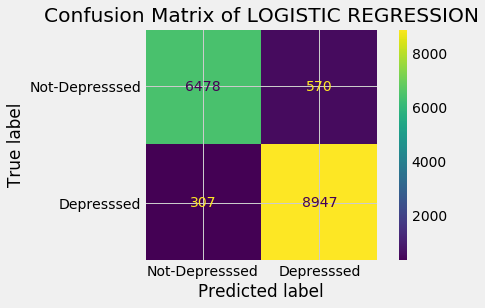

############################################################################




############################################################################
Model name : NAIVE BAYES
############################################################################
MODEL EVALUATION
############################################################################
Accuracy : 86.45564961354435 
Precision: 90.5221992178514 
Recall: 85.04430516533391 
F1 score: 87.69779362603076 

############################################################################
CLASSIFICATION REPORT
############################################################################
                precision    recall  f1-score   support

Not-Depresssed       0.82      0.88      0.85      7048
    Depresssed       0.91      0.85      0.88      9254

      accuracy                           0.86     16302
     macro avg       0.86      0.87      0.86     16302
  weighted avg       0.87      0.86      0.87     16302

###############

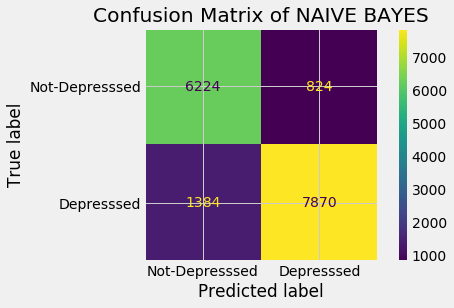

############################################################################




############################################################################
Model name : NEURAL NETWORK
############################################################################


C:\Users\hemal\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



MODEL EVALUATION
############################################################################
Accuracy : 94.65709728867624 
Precision: 95.07473921927088 
Recall: 95.53706505295008 
F1 score: 95.30534145421225 

############################################################################
CLASSIFICATION REPORT
############################################################################
                precision    recall  f1-score   support

Not-Depresssed       0.94      0.94      0.94      7048
    Depresssed       0.95      0.96      0.95      9254

      accuracy                           0.95     16302
     macro avg       0.95      0.95      0.95     16302
  weighted avg       0.95      0.95      0.95     16302

############################################################################
CONFUSION MATRIX
############################################################################


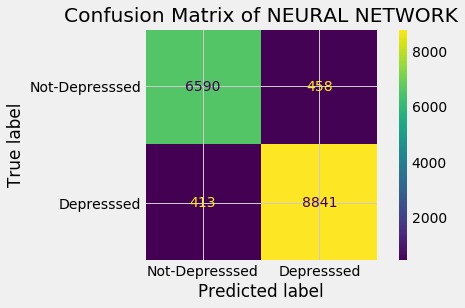

############################################################################




############################################################################
Model name : DECISION TREE
############################################################################
MODEL EVALUATION
############################################################################
Accuracy : 71.21825542878175 
Precision: 66.90130409010077 
Recall: 97.56861897557812 
F1 score: 79.37582417582418 

############################################################################
CLASSIFICATION REPORT
############################################################################
                precision    recall  f1-score   support

Not-Depresssed       0.92      0.37      0.52      7048
    Depresssed       0.67      0.98      0.79      9254

      accuracy                           0.71     16302
     macro avg       0.79      0.67      0.66     16302
  weighted avg       0.78      0.71      0.68     16302

############

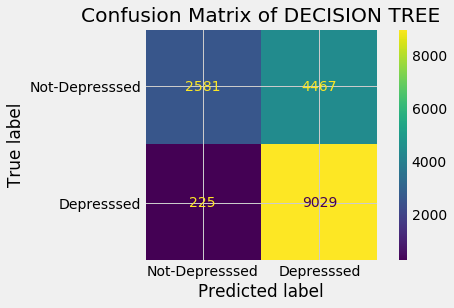

############################################################################




############################################################################
Model name : SUPPORT VECTOR MACHINE
############################################################################
MODEL EVALUATION
############################################################################
Accuracy : 95.81646423751687 
Precision: 95.71245733788396 
Recall: 96.97428139183056 
F1 score: 96.33923778851316 

############################################################################
CLASSIFICATION REPORT
############################################################################
                precision    recall  f1-score   support

Not-Depresssed       0.96      0.94      0.95      7048
    Depresssed       0.96      0.97      0.96      9254

      accuracy                           0.96     16302
     macro avg       0.96      0.96      0.96     16302
  weighted avg       0.96      0.96      0.96     16302

###

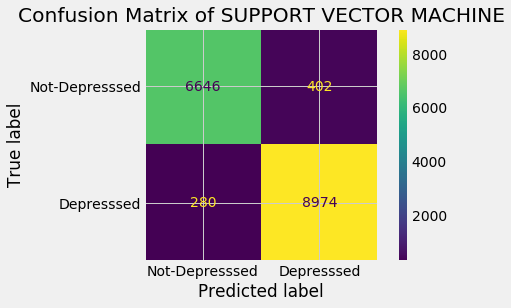

############################################################################




############################################################################
Model name : RANDOM FOREST
############################################################################
MODEL EVALUATION
############################################################################
Accuracy : 93.04993252361673 
Precision: 94.20794774088186 
Recall: 93.50551113032203 
F1 score: 93.85541515266554 

############################################################################
CLASSIFICATION REPORT
############################################################################
                precision    recall  f1-score   support

Not-Depresssed       0.92      0.92      0.92      7048
    Depresssed       0.94      0.94      0.94      9254

      accuracy                           0.93     16302
     macro avg       0.93      0.93      0.93     16302
  weighted avg       0.93      0.93      0.93     16302

############

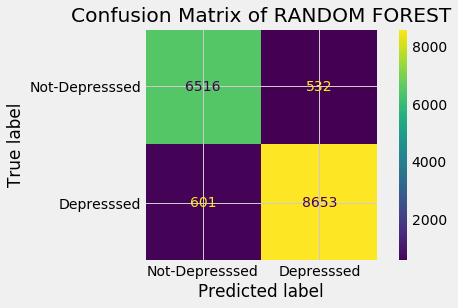

############################################################################






In [36]:
model_metrices_CV = {}

for name in model_object.keys():
    model_metrices_CV[name] = model_train_predict(name,X1_train, y1_train,X1_test,y1_test,outputpath)

## Classification using TFIDF method

############################################################################
Model name : LOGISTIC REGRESSION
############################################################################


C:\Users\hemal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



MODEL EVALUATION
############################################################################
Accuracy : 91.92123665807877 
Precision: 90.04136817677329 
Recall: 96.43397449751458 
F1 score: 93.12809809548656 

############################################################################
CLASSIFICATION REPORT
############################################################################
                precision    recall  f1-score   support

Not-Depresssed       0.95      0.86      0.90      7048
    Depresssed       0.90      0.96      0.93      9254

      accuracy                           0.92     16302
     macro avg       0.92      0.91      0.92     16302
  weighted avg       0.92      0.92      0.92     16302

############################################################################
CONFUSION MATRIX
############################################################################


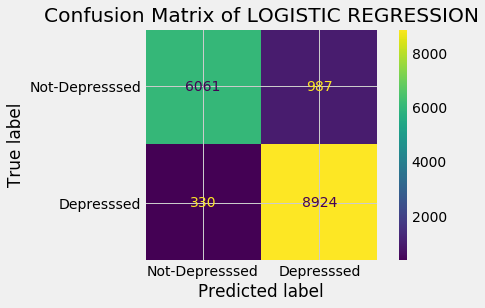

############################################################################




############################################################################
Model name : NAIVE BAYES
############################################################################
MODEL EVALUATION
############################################################################
Accuracy : 86.3513679303153 
Precision: 86.1165347857363 
Recall: 90.55543548735682 
F1 score: 88.2802212272847 

############################################################################
CLASSIFICATION REPORT
############################################################################
                precision    recall  f1-score   support

Not-Depresssed       0.87      0.81      0.84      7048
    Depresssed       0.86      0.91      0.88      9254

      accuracy                           0.86     16302
     macro avg       0.86      0.86      0.86     16302
  weighted avg       0.86      0.86      0.86     16302

#################

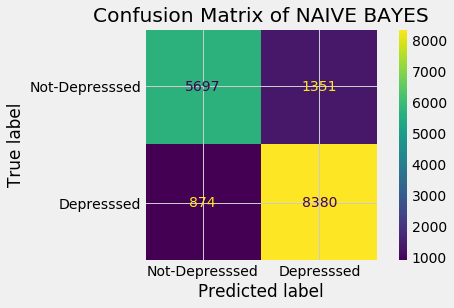

############################################################################




############################################################################
Model name : NEURAL NETWORK
############################################################################


C:\Users\hemal\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



MODEL EVALUATION
############################################################################
Accuracy : 94.36878910563121 
Precision: 94.57754010695187 
Recall: 95.55867732872272 
F1 score: 95.06557729520534 

############################################################################
CLASSIFICATION REPORT
############################################################################
                precision    recall  f1-score   support

Not-Depresssed       0.94      0.93      0.93      7048
    Depresssed       0.95      0.96      0.95      9254

      accuracy                           0.94     16302
     macro avg       0.94      0.94      0.94     16302
  weighted avg       0.94      0.94      0.94     16302

############################################################################
CONFUSION MATRIX
############################################################################


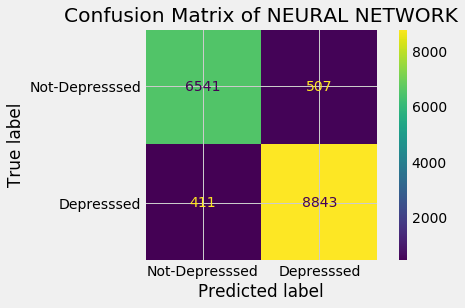

############################################################################




############################################################################
Model name : DECISION TREE
############################################################################
MODEL EVALUATION
############################################################################
Accuracy : 71.17531591215803 
Precision: 66.86162730436071 
Recall: 97.59023125135077 
F1 score: 79.35503712490663 

############################################################################
CLASSIFICATION REPORT
############################################################################
                precision    recall  f1-score   support

Not-Depresssed       0.92      0.36      0.52      7048
    Depresssed       0.67      0.98      0.79      9254

      accuracy                           0.71     16302
     macro avg       0.79      0.67      0.66     16302
  weighted avg       0.78      0.71      0.68     16302

############

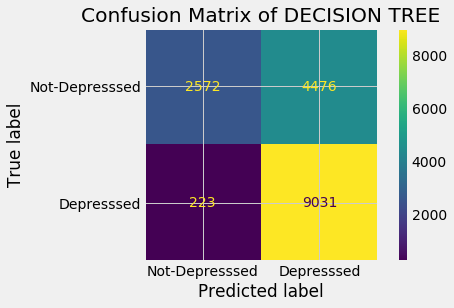

############################################################################




############################################################################
Model name : SUPPORT VECTOR MACHINE
############################################################################
MODEL EVALUATION
############################################################################
Accuracy : 94.35038645564961 
Precision: 93.66027454678823 
Recall: 96.58526042792306 
F1 score: 95.10028195988723 

############################################################################
CLASSIFICATION REPORT
############################################################################
                precision    recall  f1-score   support

Not-Depresssed       0.95      0.91      0.93      7048
    Depresssed       0.94      0.97      0.95      9254

      accuracy                           0.94     16302
     macro avg       0.94      0.94      0.94     16302
  weighted avg       0.94      0.94      0.94     16302

###

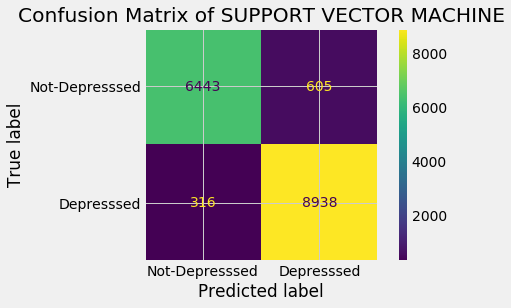

############################################################################




############################################################################
Model name : RANDOM FOREST
############################################################################
MODEL EVALUATION
############################################################################
Accuracy : 92.38743712427923 
Precision: 93.02974975835033 
Recall: 93.6027663712989 
F1 score: 93.31537840021545 

############################################################################
CLASSIFICATION REPORT
############################################################################
                precision    recall  f1-score   support

Not-Depresssed       0.92      0.91      0.91      7048
    Depresssed       0.93      0.94      0.93      9254

      accuracy                           0.92     16302
     macro avg       0.92      0.92      0.92     16302
  weighted avg       0.92      0.92      0.92     16302

#############

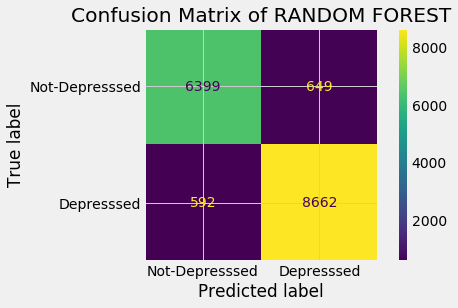

############################################################################






In [37]:
model_metrices_TFIDF = {}
for name in model_object.keys():
    model_metrices_TFIDF[name] = model_train_predict(name,X2_train, y2_train,X2_test,y2_test,outputpath)
    

In [38]:
model_metrices_TFIDF

{'LR': [91.92123665807877,
  90.04136817677329,
  96.43397449751458,
  93.12809809548656],
 'NB': [86.3513679303153,
  86.1165347857363,
  90.55543548735682,
  88.2802212272847],
 'NN': [94.36878910563121,
  94.57754010695187,
  95.55867732872272,
  95.06557729520534],
 'DT': [71.17531591215803,
  66.86162730436071,
  97.59023125135077,
  79.35503712490663],
 'SVM': [94.35038645564961,
  93.66027454678823,
  96.58526042792306,
  95.10028195988723],
 'RF': [92.38743712427923,
  93.02974975835033,
  93.6027663712989,
  93.31537840021545]}

In [39]:
model_metrices_CV

{'LR': [94.62029198871305,
  94.01071766312914,
  96.68251566889994,
  95.32789941931703],
 'NB': [86.45564961354435,
  90.5221992178514,
  85.04430516533391,
  87.69779362603076],
 'NN': [94.65709728867624,
  95.07473921927088,
  95.53706505295008,
  95.30534145421225],
 'DT': [71.21825542878175,
  66.90130409010077,
  97.56861897557812,
  79.37582417582418],
 'SVM': [95.81646423751687,
  95.71245733788396,
  96.97428139183056,
  96.33923778851316],
 'RF': [93.04993252361673,
  94.20794774088186,
  93.50551113032203,
  93.85541515266554]}

## Comparison between countvector and TFIDF methods for different classification models

### Count Vector Method

In [40]:
CV_metrix_df = pd.DataFrame.from_dict(model_metrices_CV, orient='index',columns=["CV_ACCURACY","CV_PRECISION", "CV_RECALL","CV_F1SCORE"])
CV_metrix_df

,CV_ACCURACY,CV_PRECISION,CV_RECALL,CV_F1SCORE
LR,94.620292,94.010718,96.682516,95.327899
NB,86.455650,90.522199,85.044305,87.697794
NN,94.657097,95.074739,95.537065,95.305341
DT,71.218255,66.901304,97.568619,79.375824
SVM,95.816464,95.712457,96.974281,96.339238
RF,93.049933,94.207948,93.505511,93.855415


### TFIDF method

In [41]:
TDIDF_metrix_df = pd.DataFrame.from_dict(model_metrices_TFIDF, orient='index',columns=["TFIDF_ACCURACY","TFIDF_PRECISION", "TFIDF_RECALL","TFIDF_F1SCORE"])
TDIDF_metrix_df

,TFIDF_ACCURACY,TFIDF_PRECISION,TFIDF_RECALL,TFIDF_F1SCORE
LR,91.921237,90.041368,96.433974,93.128098
NB,86.351368,86.116535,90.555435,88.280221
NN,94.368789,94.577540,95.558677,95.065577
DT,71.175316,66.861627,97.590231,79.355037
SVM,94.350386,93.660275,96.585260,95.100282
RF,92.387437,93.029750,93.602766,93.315378


## combining 2 dfs

In [42]:
combined_results = pd.concat([TDIDF_metrix_df, CV_metrix_df], axis=1)
# reorder the column
combined_results = combined_results[["CV_ACCURACY","TFIDF_ACCURACY","CV_PRECISION","TFIDF_PRECISION","CV_RECALL","TFIDF_RECALL","CV_F1SCORE","TFIDF_F1SCORE"]]
combined_results.index = ['LOGISTIC REGRESSION', 'NAIVE BAYES', 'NEURAL NETWORK', 'DECISION TREE',"SVM","RF"] 
combined_results

,CV_ACCURACY,TFIDF_ACCURACY,CV_PRECISION,TFIDF_PRECISION,CV_RECALL,TFIDF_RECALL,CV_F1SCORE,TFIDF_F1SCORE
LOGISTIC REGRESSION,94.620292,91.921237,94.010718,90.041368,96.682516,96.433974,95.327899,93.128098
NAIVE BAYES,86.455650,86.351368,90.522199,86.116535,85.044305,90.555435,87.697794,88.280221
NEURAL NETWORK,94.657097,94.368789,95.074739,94.577540,95.537065,95.558677,95.305341,95.065577
DECISION TREE,71.218255,71.175316,66.901304,66.861627,97.568619,97.590231,79.375824,79.355037
SVM,95.816464,94.350386,95.712457,93.660275,96.974281,96.585260,96.339238,95.100282
RF,93.049933,92.387437,94.207948,93.029750,93.505511,93.602766,93.855415,93.315378


## Plotting the comparison results

In [51]:
# data to plot
def plot_comparison(index,column1,column2,name,outputpath):
    n_models = np.arange(len(index))
    # create plot
    fig1, ax = plt.subplots()
    bar_width = 0.35

    ax = plt.bar(n_models+1, column1, bar_width, color='#5cb85c', label = name + " BOW")
    ax1 = plt.bar(n_models + bar_width+1, column2, bar_width, color='#5bc0de', label = name + " TFIDF")

    plt.xlabel('Models')
    plt.ylabel('Scores')
    title = name + " Score for the models with BOW and TDFIF"
    plt.title(title)
    plt.xticks(n_models + bar_width + 1, index)
    plt.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()
    

##################################################
ACCURACY
##################################################


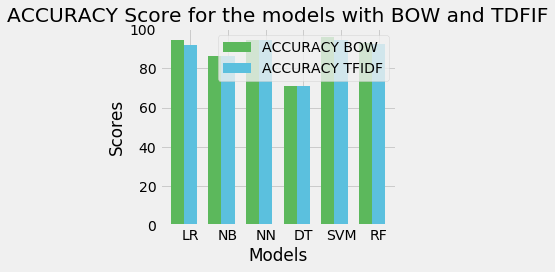

##################################################
PRECISION
##################################################


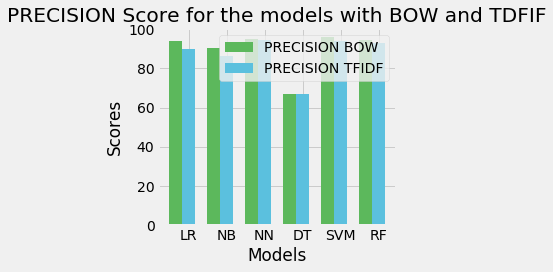

##################################################
RECALL
##################################################


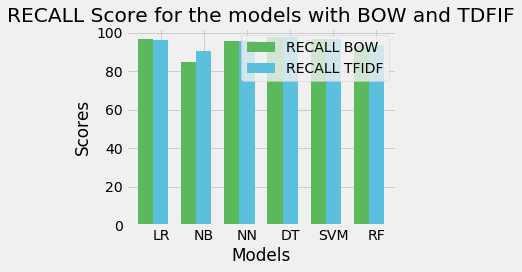

##################################################
F1SCORE
##################################################


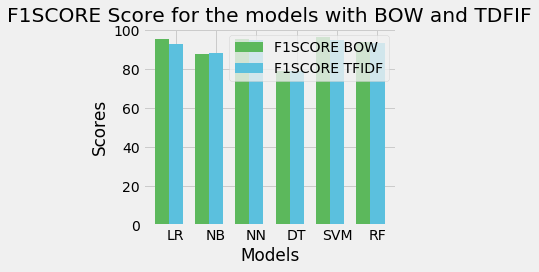

In [52]:
Xlables = ["LR","NB","NN","DT","SVM","RF"]
for i in range(0,len(combined_results.columns)-1,2):
    print("##################################################")
    print(combined_results.columns[i][3:])
    print("##################################################")
    
    plot_comparison(Xlables,combined_results[combined_results.columns[i]],combined_results[combined_results.columns[i+1]],combined_results.columns[i][3:],outputpath)
    

# Clustering 

#### Read the pre-processed csv file obtained from sentiment analysis containing positive, negative and neutral tweets
#### Separate the negative tweets from the other two categories and convert into vector values based on Tf-Idf vectorization.


#### Run the k-means clustering method with elbow method of cluster analysis.
#### Visualization of the clusters and top feature words from each cluster 

## Clustering of negative sentiment depression tweets

### retrieve tweets from sentiment analysis

In [ ]:
sentpath = inputpath + "sentiment_analysisComplete.csv"
sent = pd.read_csv(sentpath)
sent.head()


### Negative tweets for train and test

In [ ]:
sentiment_neg = sent[sent["sentiment"].isin(["negative"])]
sentiment_neg.head()    
X_train, X_test = train_test_split(sentiment_neg['preprocessed_data'], test_size=0.33, random_state=42)    
   

### Tf-idf Vectorization 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#data = sentiment_neg['preprocessed_data']
data = X_train

tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
                                   
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [ ]:
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names()).head()

### K-means clustering 

In [ ]:
from sklearn.cluster import KMeans
sklearn_pca = PCA(n_components = 3)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=5, max_iter=300, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

### Elbow method to find the number of efficient clusters

In [ ]:
fig1 = plt.figure(figsize=(10, 7))
number_clusters = range(1, 10)

kmeans = [KMeans(n_clusters=i, max_iter = 300) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()
fig1path = outputpath + "elbowMethod_graph.png"
fig1.savefig(fig1path)

### Visualization of k-means clustering

In [ ]:
fig2 = plt.figure(figsize=(10, 7))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=50, cmap='viridis')
centers = fitted.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);
figpath = outputpath + "clusterResults.png"
fig2.savefig(figpath)

### Top features for each cluster 

In [ ]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats,outputpath):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        fig3 = plt.figure(figsize=(10, 7))
        x_pos = [i for i,_ in enumerate(df['features'])]
        plt.barh(x_pos,df['score'], color='green' )
        plt.ylabel("Features")
        plt.xlabel("score")
        plt.yticks(x_pos, df['features'])
        plt.show()
        fig2path = outputpath + str(label)+".png"
        fig3.savefig(fig2path)
        dfs.append(df)
    return dfs


In [ ]:
dfs = get_top_features_cluster(tf_idf_array, prediction, 30,outputpath)

### data preparation for testing

In [ ]:
data_test = X_test
tf_idf_test = tf_idf_vectorizor.transform(data_test)
tf_idf_norm_test = normalize(tf_idf_test)
tf_idf_array_test = tf_idf_norm_test.toarray()
Ytest_sklearn = sklearn_pca.transform(tf_idf_array_test)

In [ ]:
prediction_test = kmeans.predict(Ytest_sklearn)

### Evaluation of test data 

In [ ]:
from sklearn.metrics import silhouette_score
print('Silhouette Score(n=5):', silhouette_score(Ytest_sklearn, prediction_test))

### Evalution of train data 

In [ ]:
print('Silhouette Score(n=5):', silhouette_score(Y_sklearn, prediction))

#########################THE END###############################